# Sonar Dataset

In [19]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import plotly.offline as py

In [2]:
sonar_reg_data = pd.read_csv("Ex07_Sonar_Regreesion.csv")
sonar_reg_data.head()

,EchoTime,WaterTemp,Clconcentration,Salinity,pH,Distance
0,4.018358,3,19.013137,34.348183,8.042168,2511.462490
1,5.850474,5,19.017350,34.355793,7.956494,3656.544021
2,3.575282,6,19.004284,34.332190,8.020561,2234.559271
3,3.808030,6,18.989512,34.305502,7.843142,2380.011199
4,5.167752,4,19.015003,34.351554,7.998218,3229.850749


In [3]:
sonar_reg_data.dropna(how = 'any', inplace = True)

In [4]:
#sonar_clf_data = pd.read_csv("Ex07_Sonar_Classification.csv")
#sonar_clf_data.head()

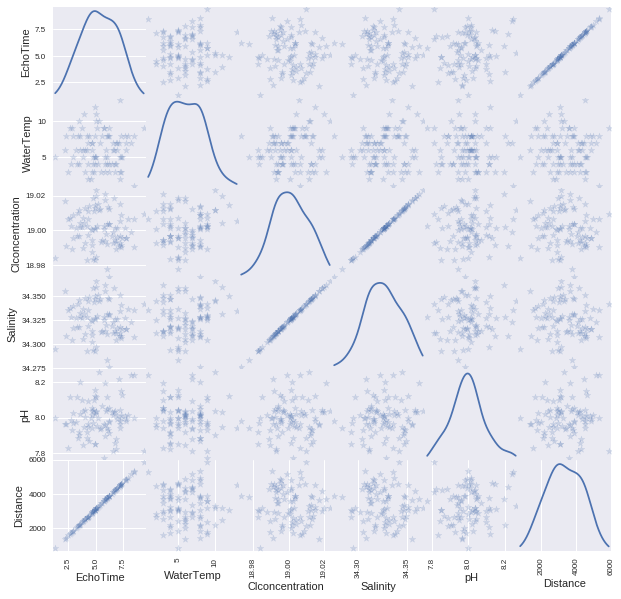

In [5]:
scatter_matrix(sonar_reg_data,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

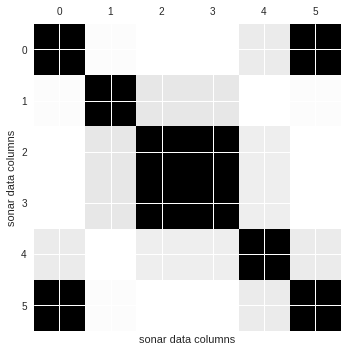

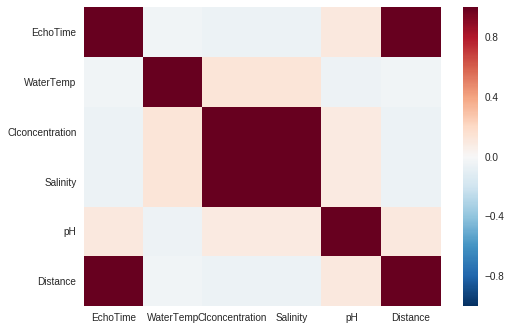

In [6]:
plt.matshow(sonar_reg_data.corr())
plt.xlabel('sonar data columns')
plt.ylabel('sonar data columns')
plt.xticklabels = sonar_reg_data.columns.values
plt.yticklabels = sonar_reg_data.columns.values
plt.show()

corr = sonar_reg_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

### Using all features

In [7]:
data_x_train1 = sonar_reg_data.iloc[:70,[0,1,2,3,4]]
data_x_test1 = sonar_reg_data.iloc[71:,[0,1,2,3,4]]
data_y_train1 = sonar_reg_data.iloc[:70,-1]
data_y_test1 = sonar_reg_data.iloc[71:,-1]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients =  [  6.24999893e+02   6.42458527e-04  -5.20943428e+10   2.88363692e+10
  -1.16751147e-02] 
intercept =  2.49288386064
Score =  0.999999999831
Mean squared error:  0.000107675042581
Root mean squared error:  0.01037665854601285


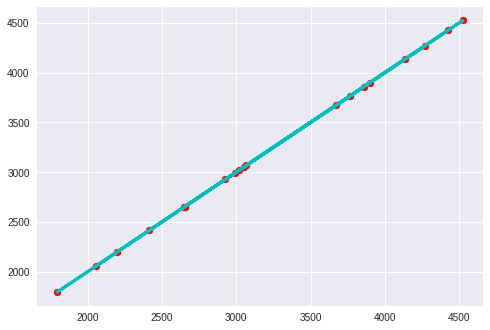

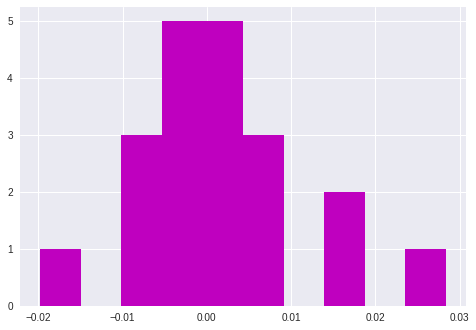

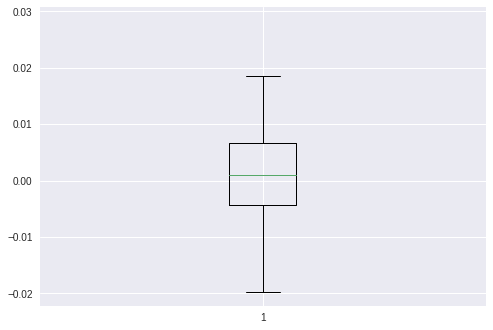

In [8]:
regr1 = linear_model.LinearRegression()
print(regr1.fit(data_x_train1, data_y_train1))
print("coefficients = ", regr1.coef_, "\nintercept = ",regr1.intercept_)
print("Score = ", regr1.score(data_x_test1, data_y_test1))
print("Mean squared error: ",np.mean((regr1.predict(data_x_test1)- data_y_test1)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr1.predict(data_x_test1)- data_y_test1)**2)))

plt.scatter(regr1.predict(data_x_test1),data_y_test1, color='r')
plt.plot(regr1.predict(data_x_test1),data_y_test1, color='c',linewidth=3)
plt.show()

plt.hist(regr1.predict(data_x_test1)- data_y_test1, color='m', bins = 10)
plt.show()
plt.boxplot(np.array(regr1.predict(data_x_test1)- data_y_test1),0)
plt.show()


In [9]:
result1 = sm.ols(formula = "Distance ~ EchoTime + WaterTemp  + Clconcentration +  Salinity + pH ", data = sonar_reg_data).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.810e+11
Date:                Sat, 01 Apr 2017   Prob (F-statistic):               0.00
Time:                        00:16:03   Log-Likelihood:                 298.23
No. Observations:                  91   AIC:                            -586.5
Df Residuals:                      86   BIC:                            -573.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0715      1.825     

### using only Echotime 

In [10]:
data_x_train2 = sonar_reg_data.iloc[:70,[0]]
data_x_test2 = sonar_reg_data.iloc[71:,[0]]
data_y_train2 = sonar_reg_data.iloc[:70,-1]
data_y_test2 = sonar_reg_data.iloc[71:,-1]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients =  [ 624.99973305] 
intercept =  0.00329940558095
Score =  0.99999999983
Mean squared error:  0.000108093576939
Root mean squared error:  0.010396806093170102


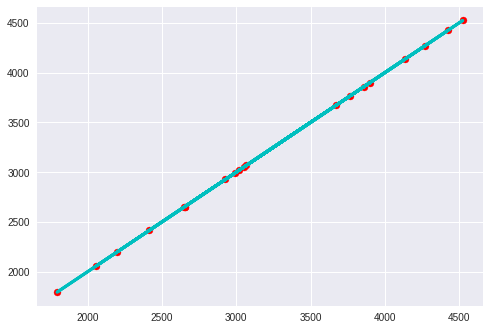

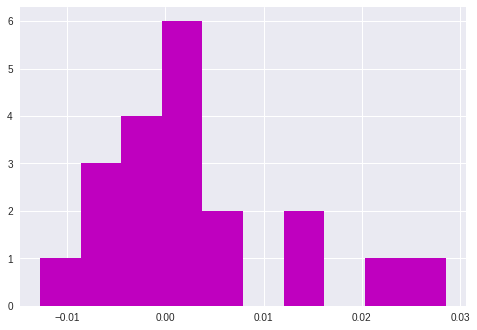

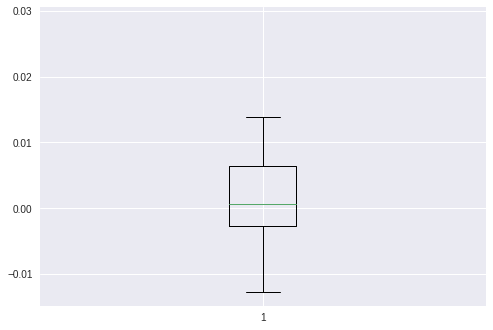

In [11]:
regr2 = linear_model.LinearRegression()
print(regr2.fit(data_x_train2, data_y_train2))
print("coefficients = ", regr2.coef_, "\nintercept = ",regr2.intercept_)
print("Score = ", regr2.score(data_x_test2, data_y_test2))
print("Mean squared error: ",np.mean((regr2.predict(data_x_test2)- data_y_test2)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr2.predict(data_x_test2)- data_y_test2)**2)))

plt.scatter(regr2.predict(data_x_test2),data_y_test2, color='r')
plt.plot(regr2.predict(data_x_test2),data_y_test2, color='c',linewidth=3)
plt.show()

plt.hist(regr2.predict(data_x_test2)- data_y_test2, color='m', bins = 10)
plt.show()
plt.boxplot(np.array(regr2.predict(data_x_test2)- data_y_test2),0)
plt.show()


In [12]:
result2 = sm.ols(formula = "Distance ~ EchoTime", data = sonar_reg_data).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.091e+12
Date:                Sat, 01 Apr 2017   Prob (F-statistic):               0.00
Time:                        00:16:04   Log-Likelihood:                 295.30
No. Observations:                  91   AIC:                            -586.6
Df Residuals:                      89   BIC:                            -581.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.003      0.408      0.6

In [13]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result2.resid, result2.model.exog)
list(zip(name,test))

[('F statistics', 1.078392337313), ('p_value', 0.40182983432198777)]

## Ridge Regression

In [15]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [20]:
#Slicing out the feature data
sonar_x = sonar_reg_data.loc[:,:'pH']
#Slicing out the target variable
sonar_y = sonar_reg_data.loc[:,'Distance']
#using a train_test_split in-built method to divide the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(sonar_x, sonar_y, test_size = 0.8, random_state=42)

In [21]:
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

(100, 5)

In [22]:
coefs_df = pd.DataFrame(coefs, columns=sonar_x.columns.values)
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df.head()

,EchoTime,WaterTemp,Clconcentration,Salinity,pH,Alpha
0,1.249999e-07,1.043550e-08,-0.000003,-0.000002,1.126835e-08,5.000000e+09
1,1.652425e-07,1.379512e-08,-0.000004,-0.000002,1.489610e-08,3.782317e+09
2,2.184408e-07,1.823634e-08,-0.000005,-0.000003,1.969177e-08,2.861184e+09
3,2.887659e-07,2.410736e-08,-0.000007,-0.000004,2.603136e-08,2.164381e+09
4,3.817315e-07,3.186852e-08,-0.000009,-0.000005,3.441192e-08,1.637275e+09


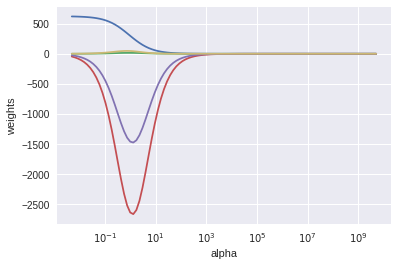

In [23]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

### plotting using pyplot

In [25]:
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.EchoTime,
    name = 'EchoTime',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.WaterTemp,
    name = 'WaterTemp',
    
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Clconcentration,
    name = 'Clconcentration',
    
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Salinity,
    name = 'Salinity',
   
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.pH,
    name = 'pH',
    
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)

data1 = [trace0, trace1, trace2, trace3, trace4]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
py.plot(fig)

'file:///home/user/Desktop/Stack/ML_Basics/ML_Basics/temp-plot.html'

#### Using another alpha value

In [26]:
ridge2 = Ridge(alpha=.005, normalize=True)
ridge2.fit(X_train, y_train)
# Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=sonar_x.columns))
# Print coefficients
print(mean_squared_error(y_test, pred2))
# Calculate the test MSE

EchoTime           621.400999
WaterTemp            0.337987
Clconcentration    -45.945593
Salinity           -25.432782
pH                   1.090053
dtype: float64
43.31751702


### Finding the best fit

In [27]:
ridgecv = RidgeCV(alphas=alphas, scoring = 'mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basi

0.0050000000000000001

## Lasso Regression

In [28]:
lasso = Lasso(max_iter=10000, normalize=True)
coeffs = []

In [29]:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)

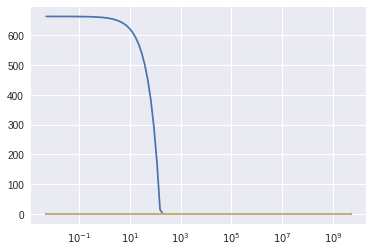

In [30]:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')

plt.show()

In [31]:
pd.Series(lasso.coef_, index = X_test.columns)

EchoTime           663.024291
WaterTemp            0.000000
Clconcentration     -0.000000
Salinity            -0.000000
pH                  -0.000000
dtype: float64